# Package Download

In [1]:
# Package Download
list.of.packages <- c("rTensor", "nnTensor", "iTensor",
    "einsum", "RColorBrewer", "TeachingDemos")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)){
    install.packages(new.packages,
        repos="https://cloud.r-project.org/", type="source")
}

# Package Loading

In [2]:
library("rTensor")
library("nnTensor")
library("iTensor")
library("einsum")
library("RColorBrewer")
library("TeachingDemos")

Warning message in system2("/usr/bin/otool", c("-L", shQuote(DSO)), stdout = TRUE):
“ 命令 ''/usr/bin/otool' -L '/Users/tsuyusakikouki/opt/anaconda3/envs/r-4.1/lib/R/library/tcltk/libs//tcltk.so'' の実行は状態 1 を持ちました ”


# Function Definition

In [3]:
plot_coef <- function(coef_matrix, colvec){
    options(repr.plot.width=12, repr.plot.height=6)
    layout(rbind(1:5, 6:10))
    for(i in seq(10)){
        tmp <- as.matrix(coef_matrix[,i])
        dim(tmp) <- c(92, 112)
        image(tmp, col=colvec, main=i)
    }
}

plot_score <- function(score_matrix, facedata, colvec){
    options(repr.plot.width=12, repr.plot.height=12)
    plot(score_matrix[,1:2], pch=16, cex=2,
        axes=FALSE, xlab="", ylab="")
    abline(v=0)
    abline(h=0)
    for(i in seq(10)){
        subplot(image(facedata@data[,,i,1], col=colvec,
            main=i, axes=FALSE),
            x=score_matrix[i,1], y=score_matrix[i,2],
            size=c(0.45, 0.45))
    }
}

# Setting

In [4]:
options(repr.plot.width=12, repr.plot.height=6)
colvec <- rev(brewer.pal(9, "Greys"))

# Data Download

In [5]:
facedata <- load_orl()
str(facedata)

Formal class 'Tensor' [package ".GlobalEnv"] with 3 slots
  ..@ num_modes: int 4
  ..@ modes    : int [1:4] 92 112 40 10
  ..@ data     : num [1:92, 1:112, 1:40, 1:10] 0.2 0.2 0.2 0.176 0.204 ...


# Plot data (1st angle)

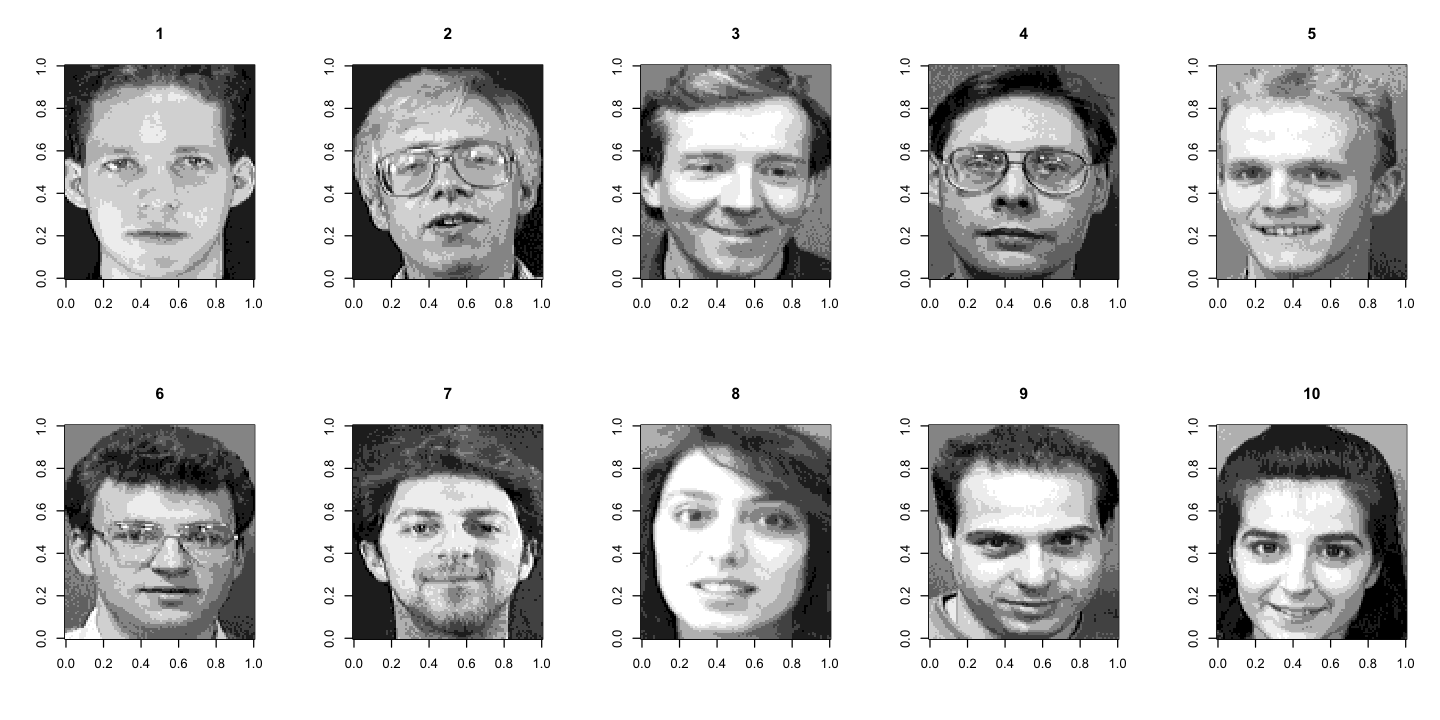

In [6]:
layout(rbind(1:5, 6:10))
for(i in seq(10)){
    image(facedata@data[,,i,1], col=colvec, main=i)
}

# Plot data (2nd angle)

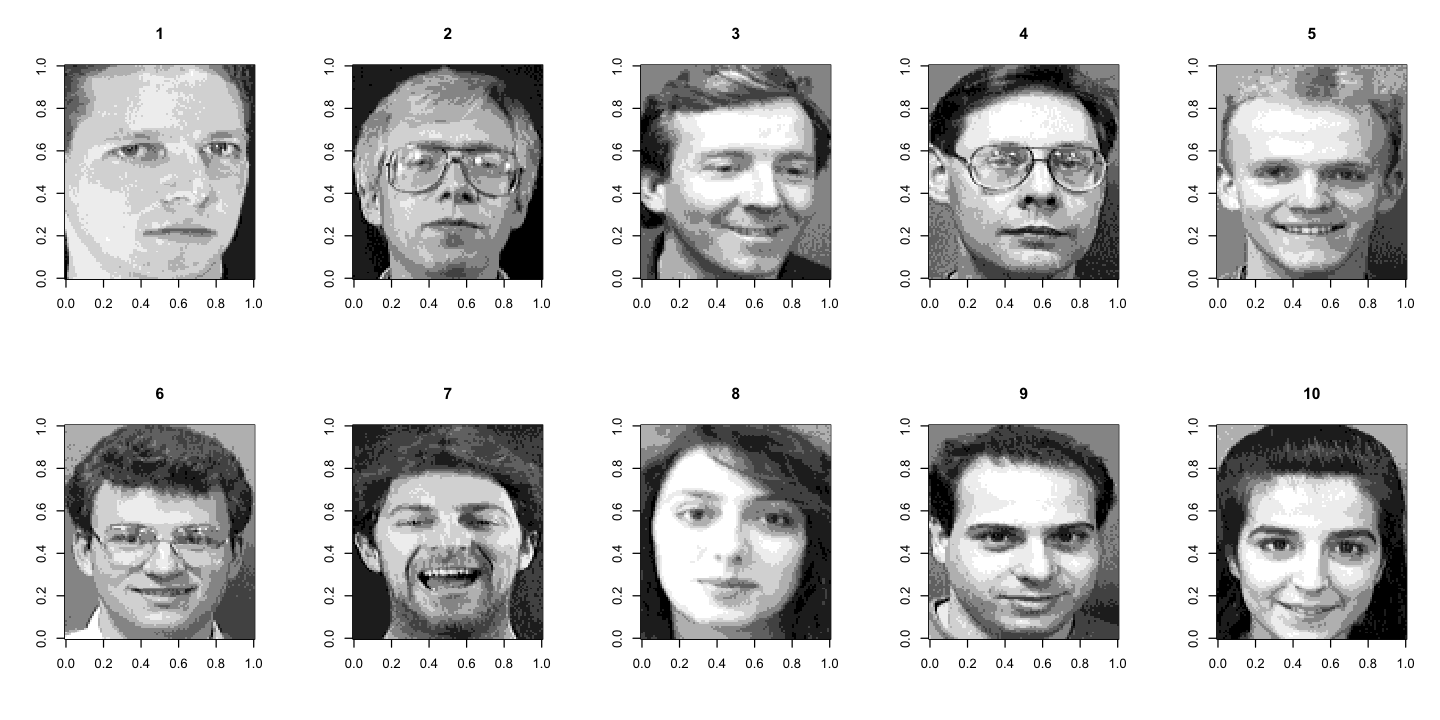

In [7]:
layout(rbind(1:5, 6:10))
for(i in seq(10)){
    image(facedata@data[,,i,2], col=colvec, main=i)
}

# Use 1st Slice (matrix)

In [8]:
matdata <- cs_unfold(facedata[,,1:10,1], m=3)@data

# Average Face

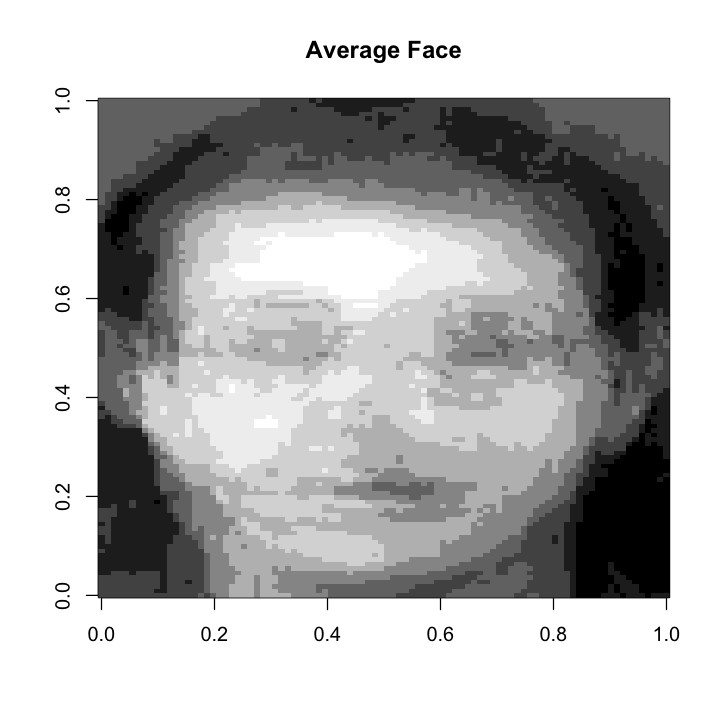

In [9]:
options(repr.plot.width=6, repr.plot.height=6)
average_face <- rowMeans(matdata)
dim(average_face) <- c(92, 112)
image(average_face, col=colvec, main="Average Face")
options(repr.plot.width=12, repr.plot.height=6)

# PCA

In [10]:
res_pca <- prcomp(t(matdata), center=TRUE, scale=FALSE)

## Plot PCA Coefficient

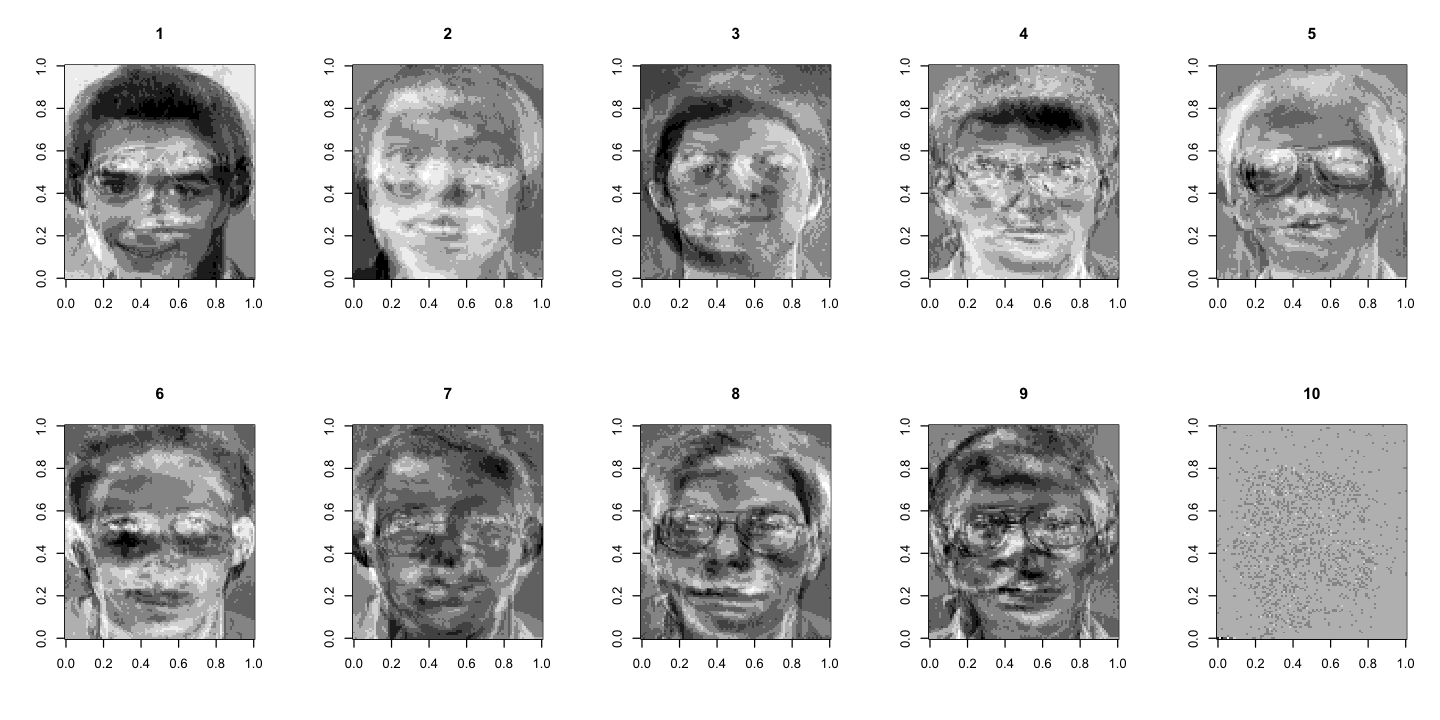

In [11]:
plot_coef(res_pca$rotation, colvec)

## Plot PCA Score

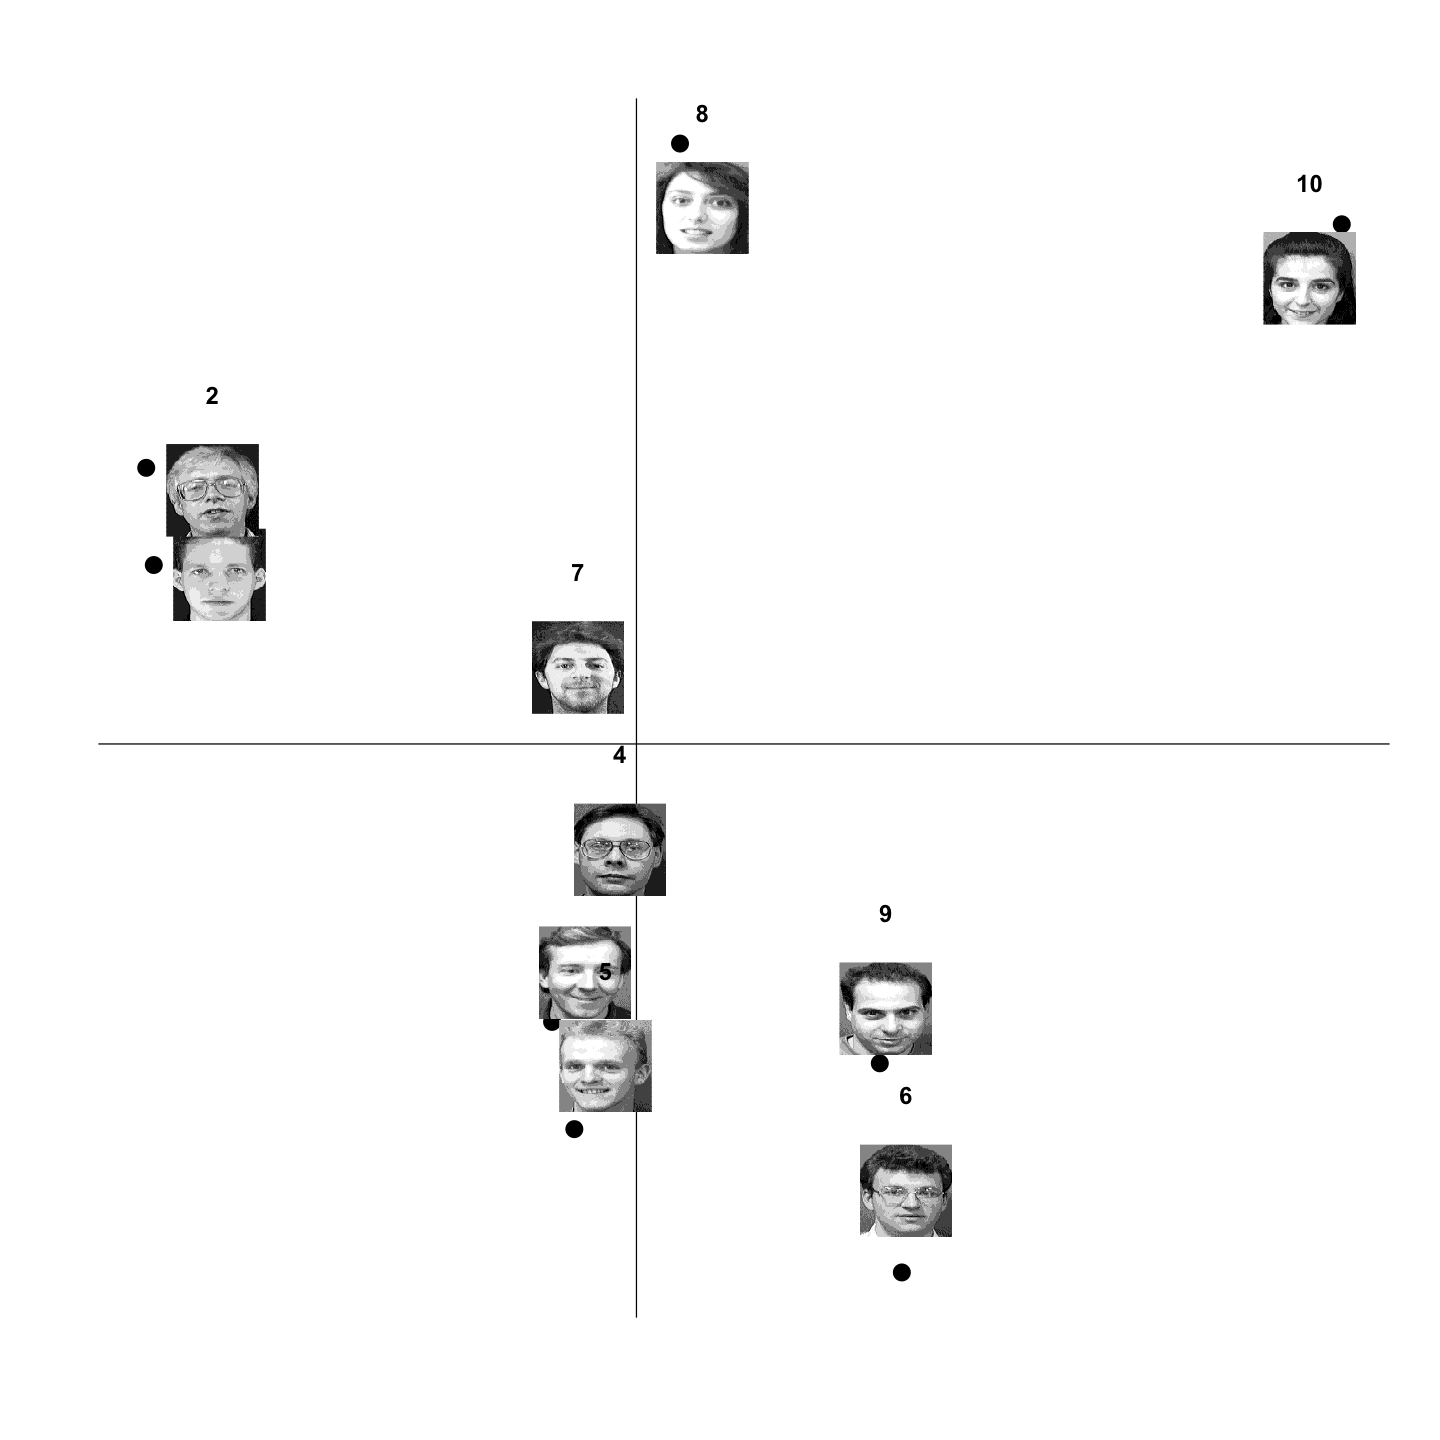

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
plot_score(res_pca$x, facedata, colvec)
options(repr.plot.width=12, repr.plot.height=6)

# SVD

In [13]:
res_svd <- svd(matdata)

## Plot SVD Coefficient

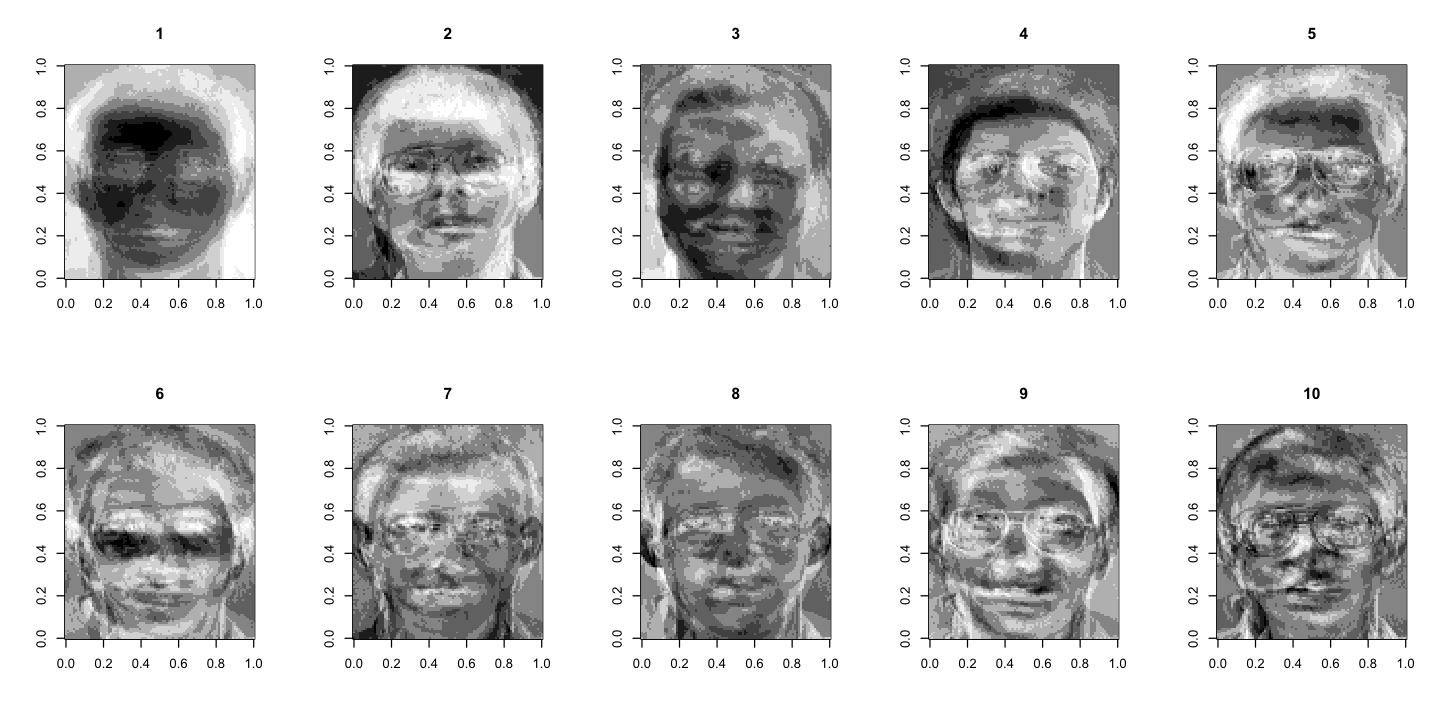

In [14]:
plot_coef(res_svd$u, colvec)

## Plot SVD Score

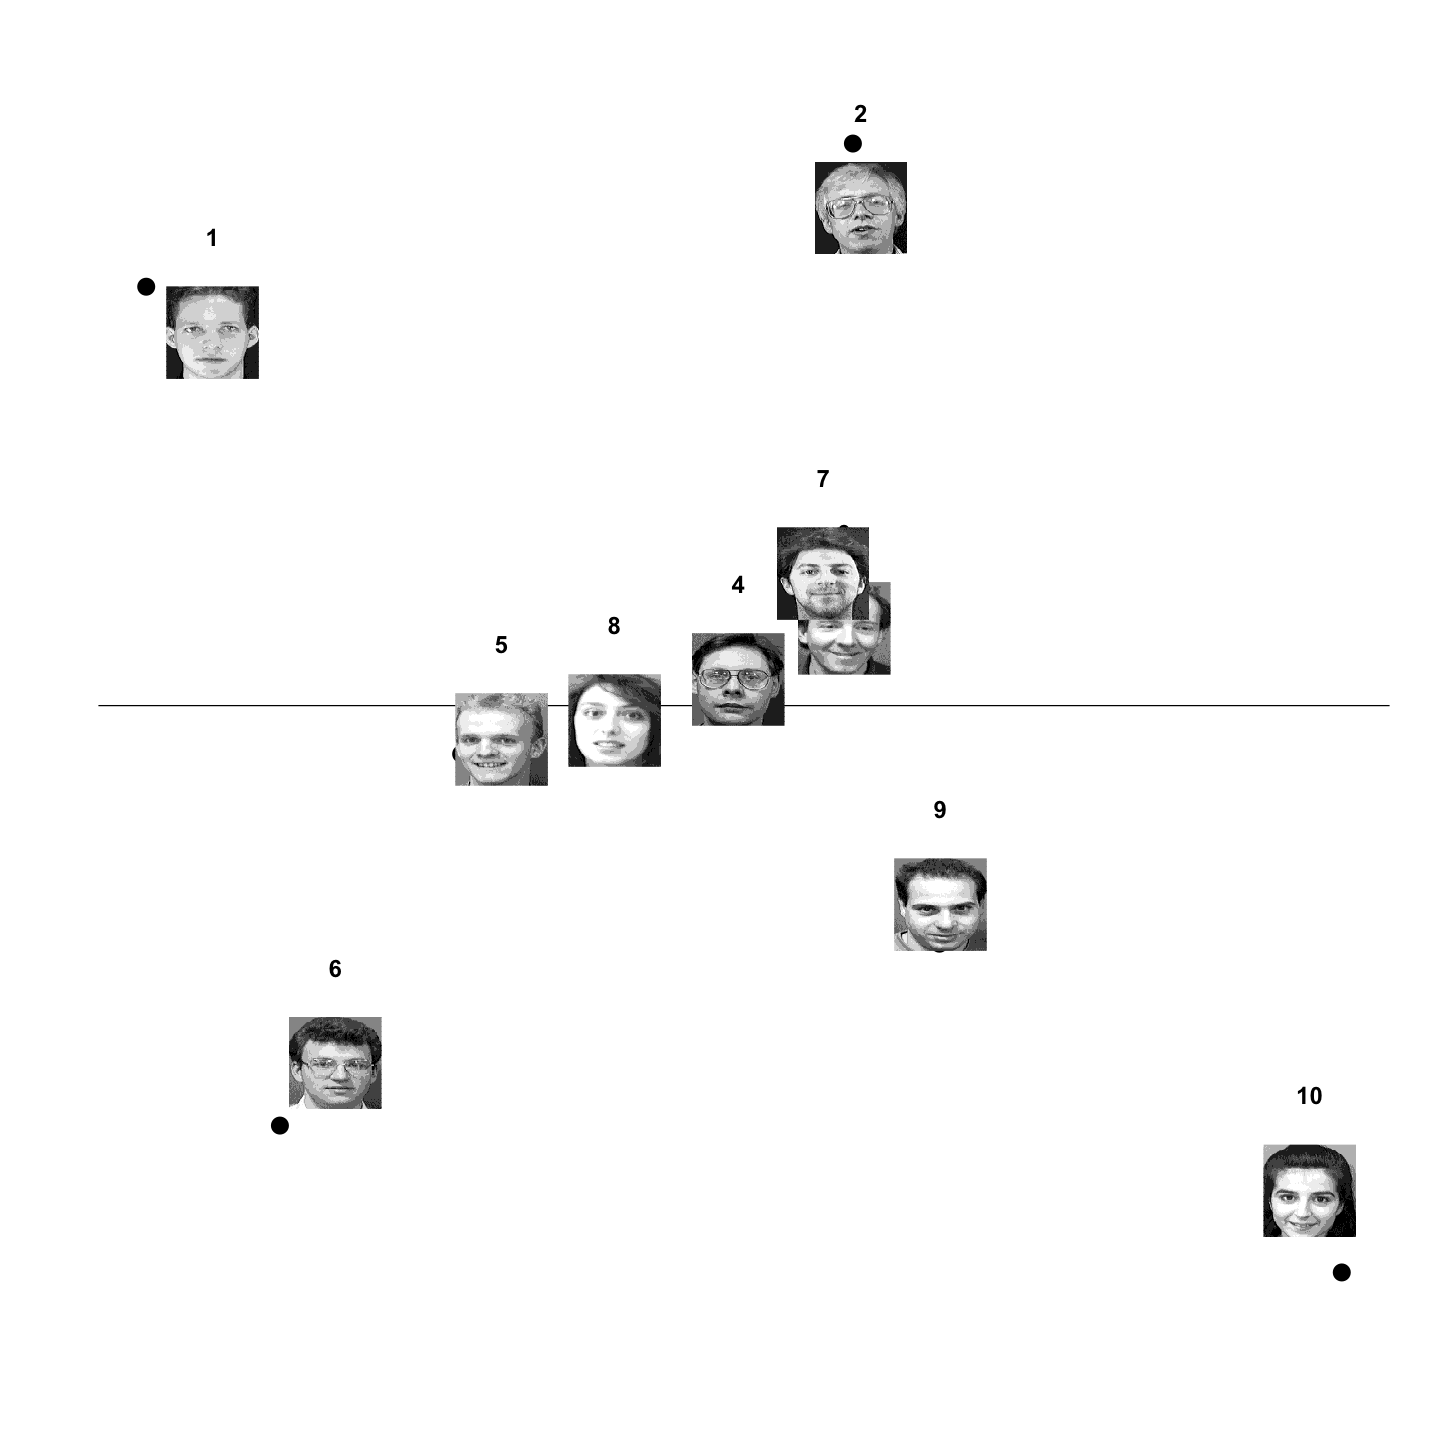

In [15]:
plot_score(res_svd$v, facedata, colvec)

# NMF

In [16]:
res_nmf <- NMF(matdata,  J=10)

## Plot NMF Coefficient

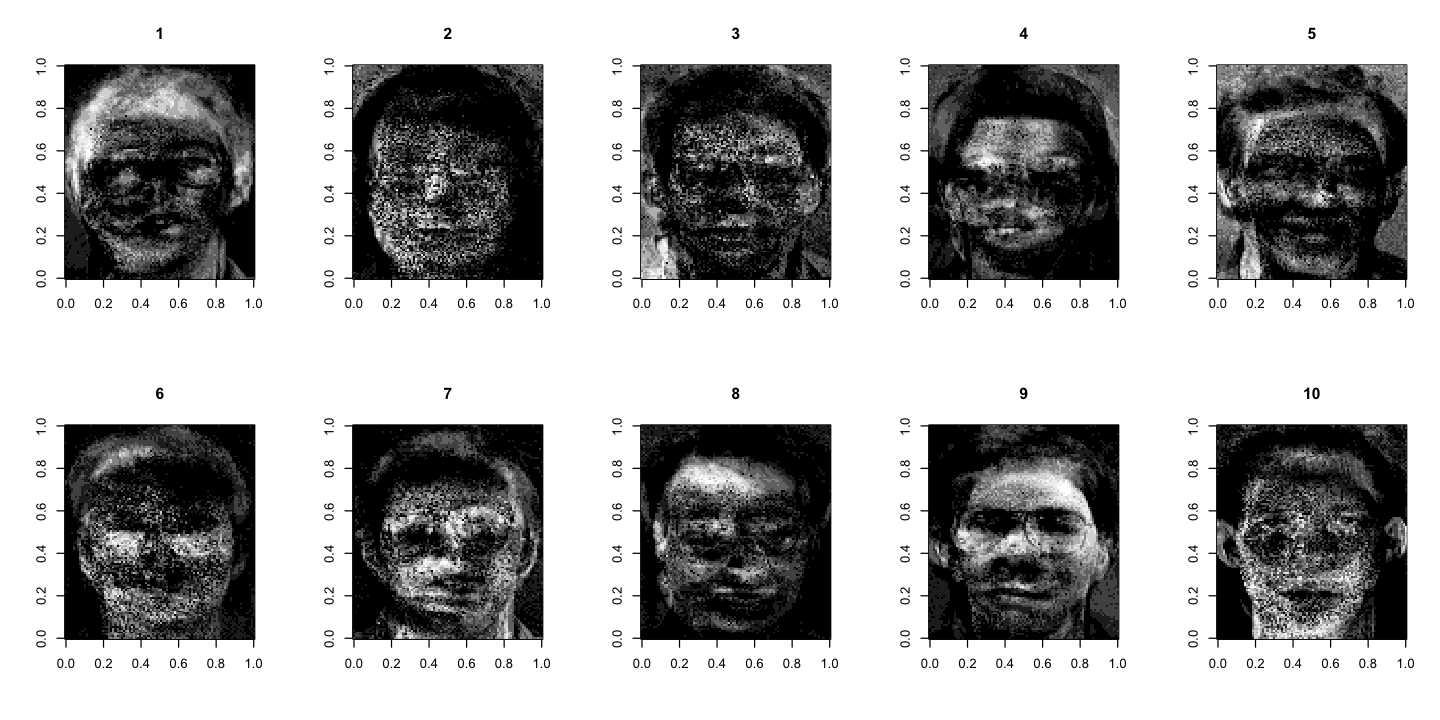

In [17]:
plot_coef(res_nmf$U, colvec)

## Plot NMF Score

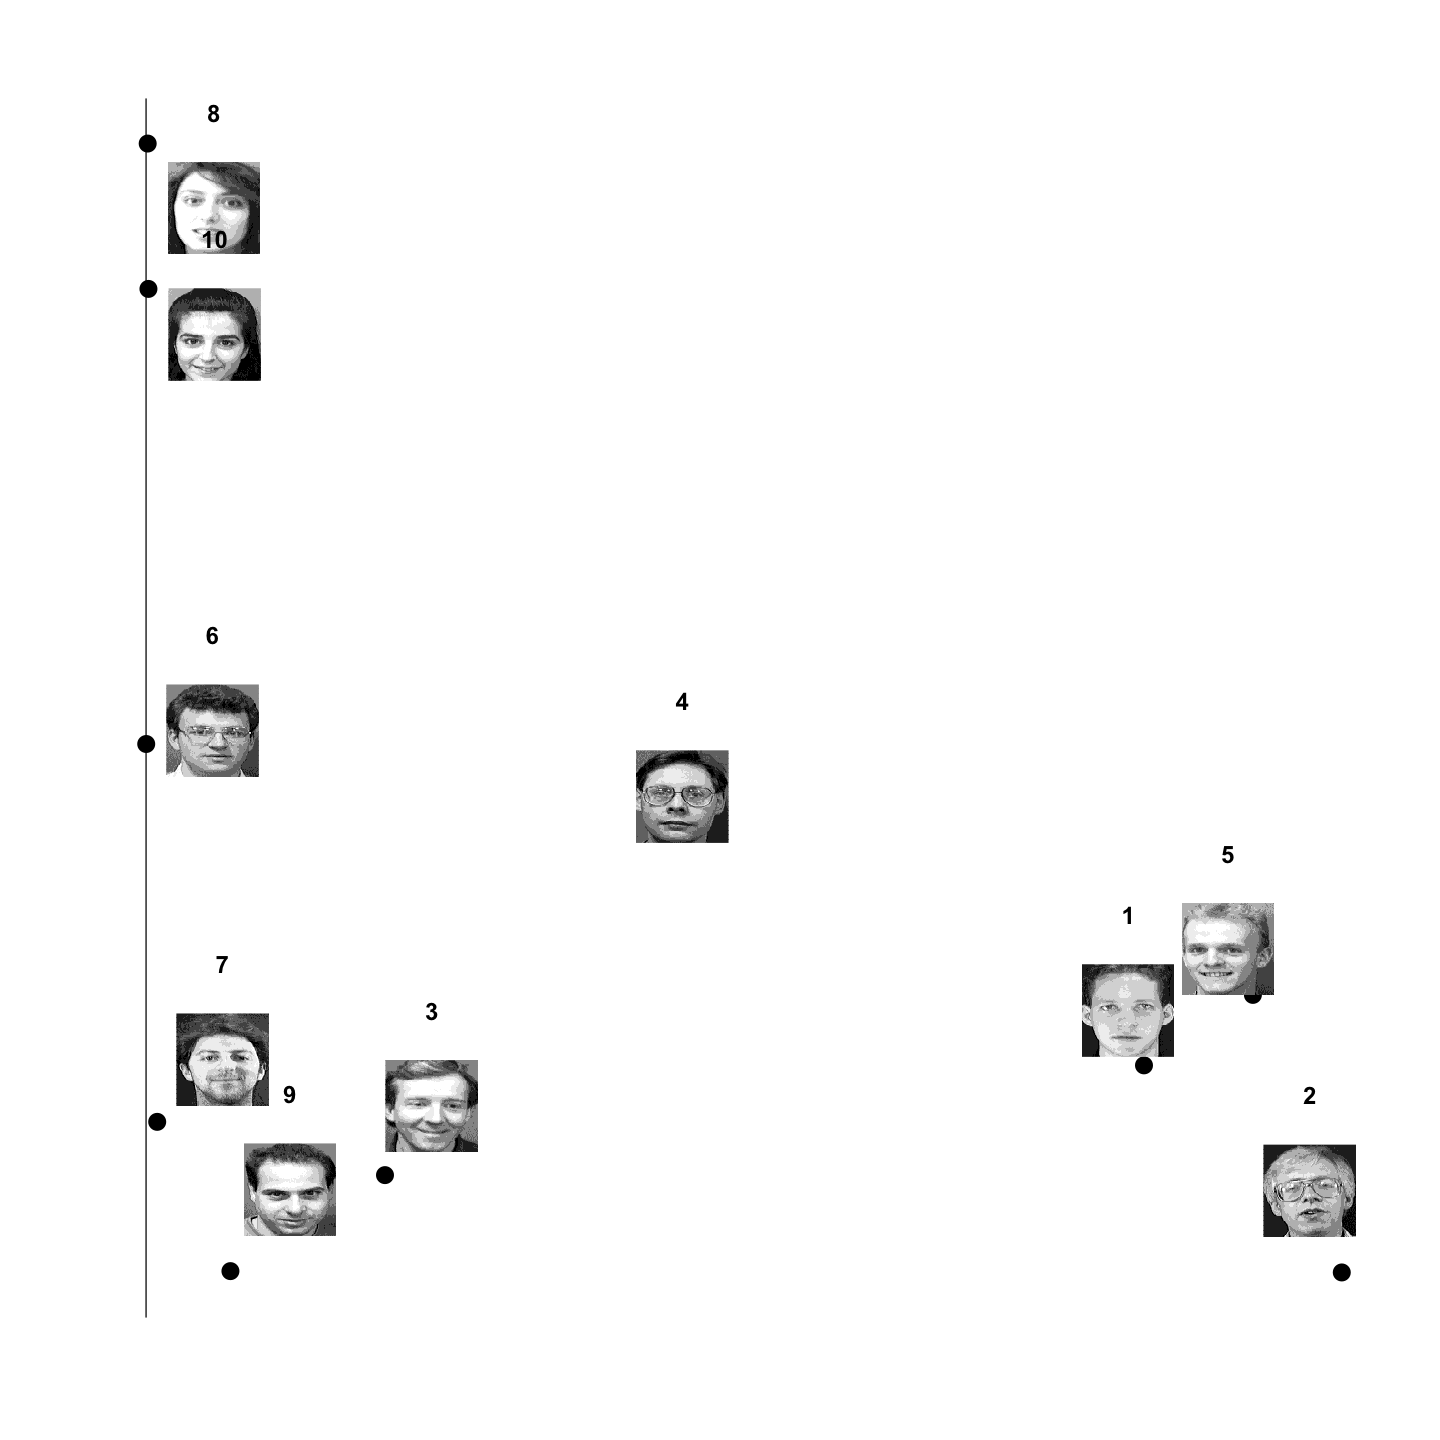

In [18]:
plot_score(res_nmf$V, facedata, colvec)

# ICA

In [19]:
res_ica <- ICA(matdata, J=10)

## Plot ICA Coefficient

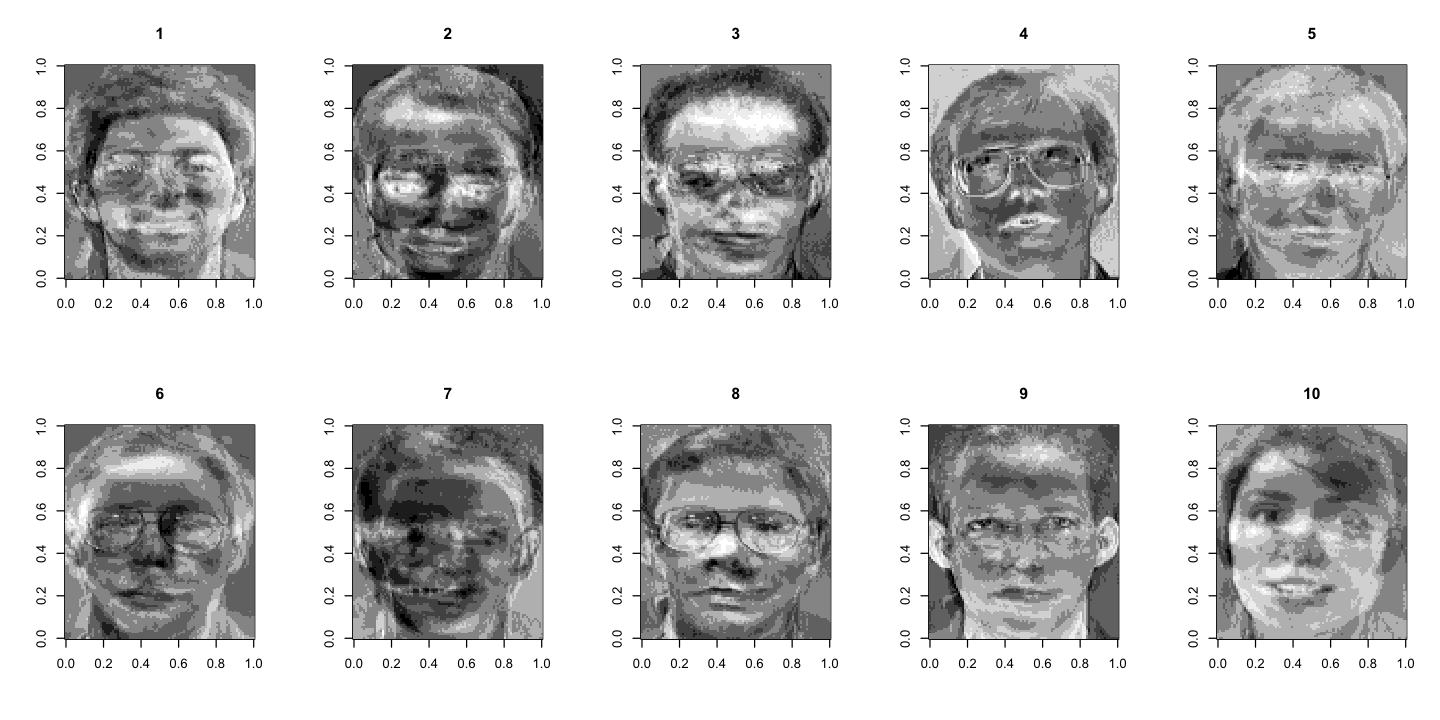

In [20]:
plot_coef(res_ica$S, colvec)

## Plot ICA Score

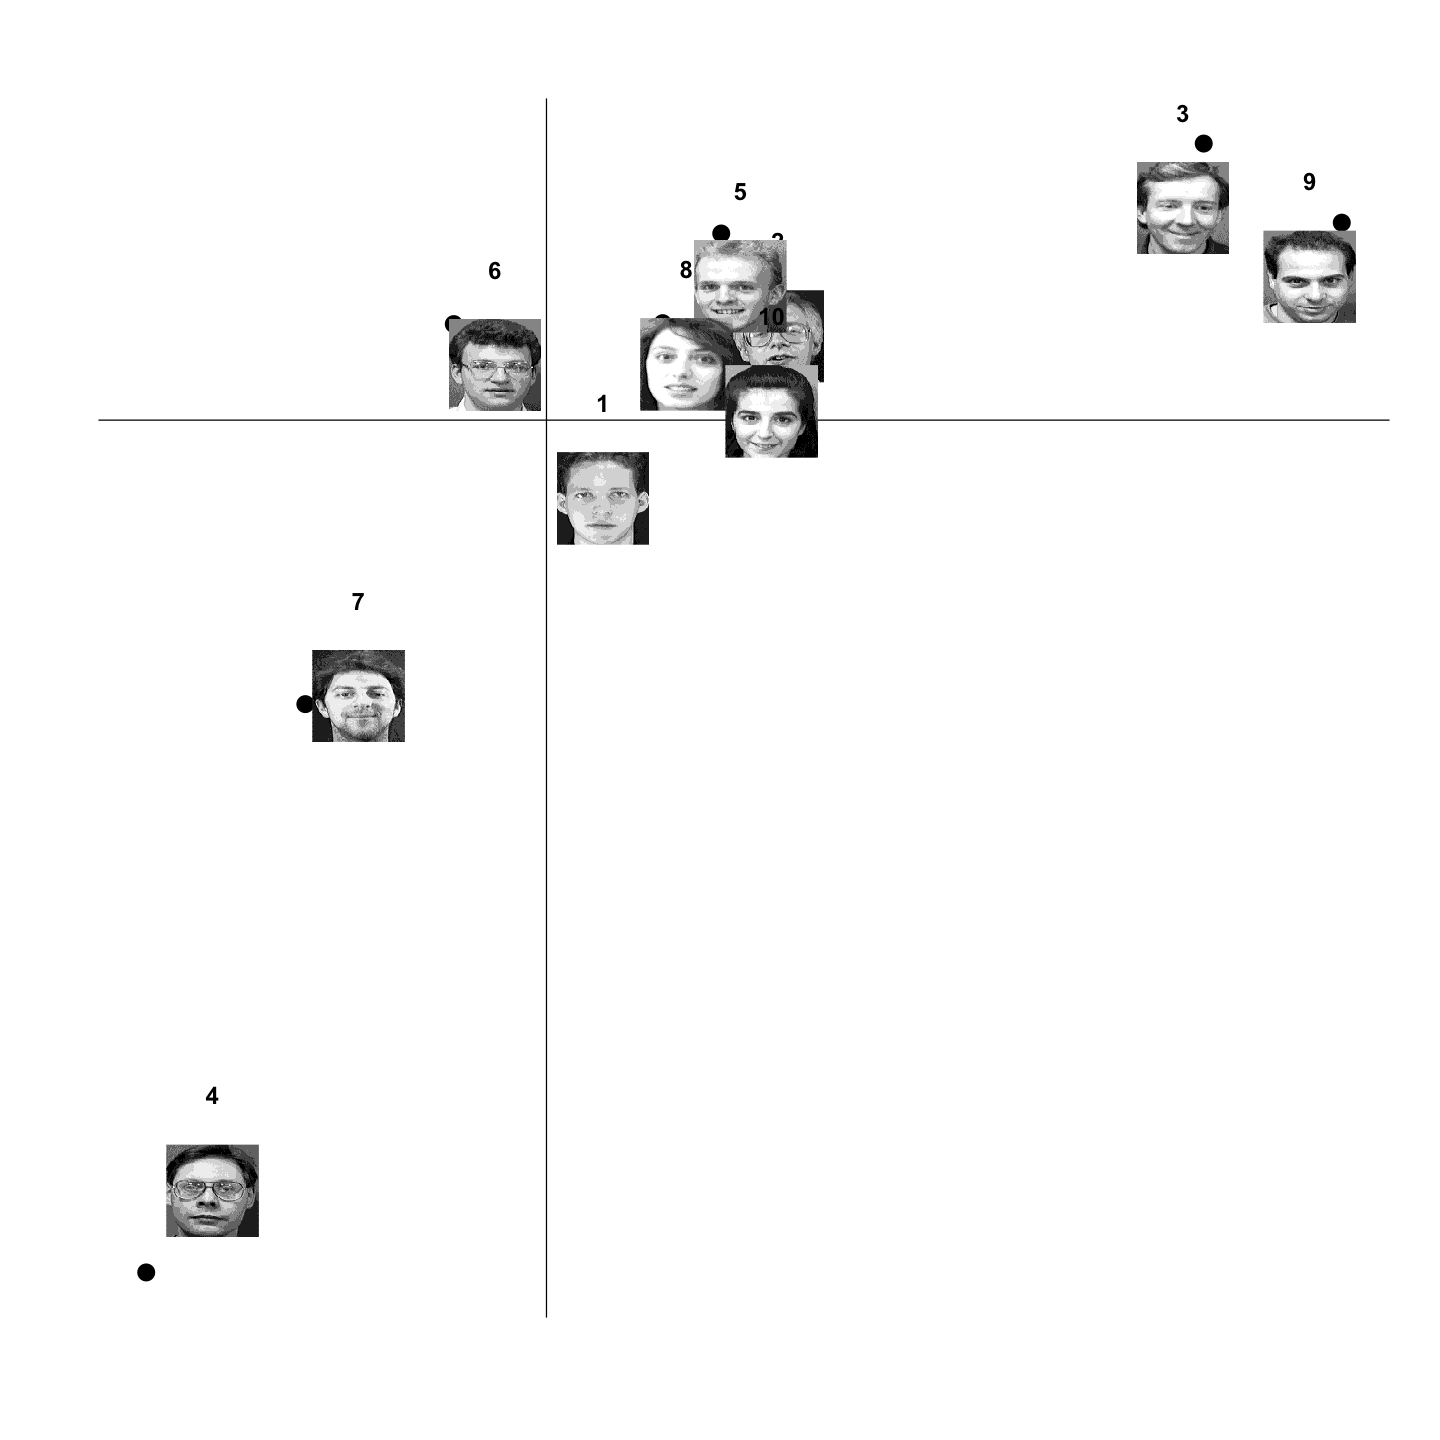

In [21]:
plot_score(res_ica$A, facedata, colvec)

# CP (Tensor Decomposition)

In [22]:
norm_facetensor <- facedata[,,1:10,1]
for(i in seq(10)){
    average_facedata <- facedata[,,i,1]@data
    average_facedata[] <- mean(facedata@data[,,i,1])
    norm_facetensor[,,i] <- facedata[,,i,1]@data - average_facedata
}
res_cp <- cp(norm_facetensor, 10)

  |======================================================================| 100%


## Plot CP Coefficient

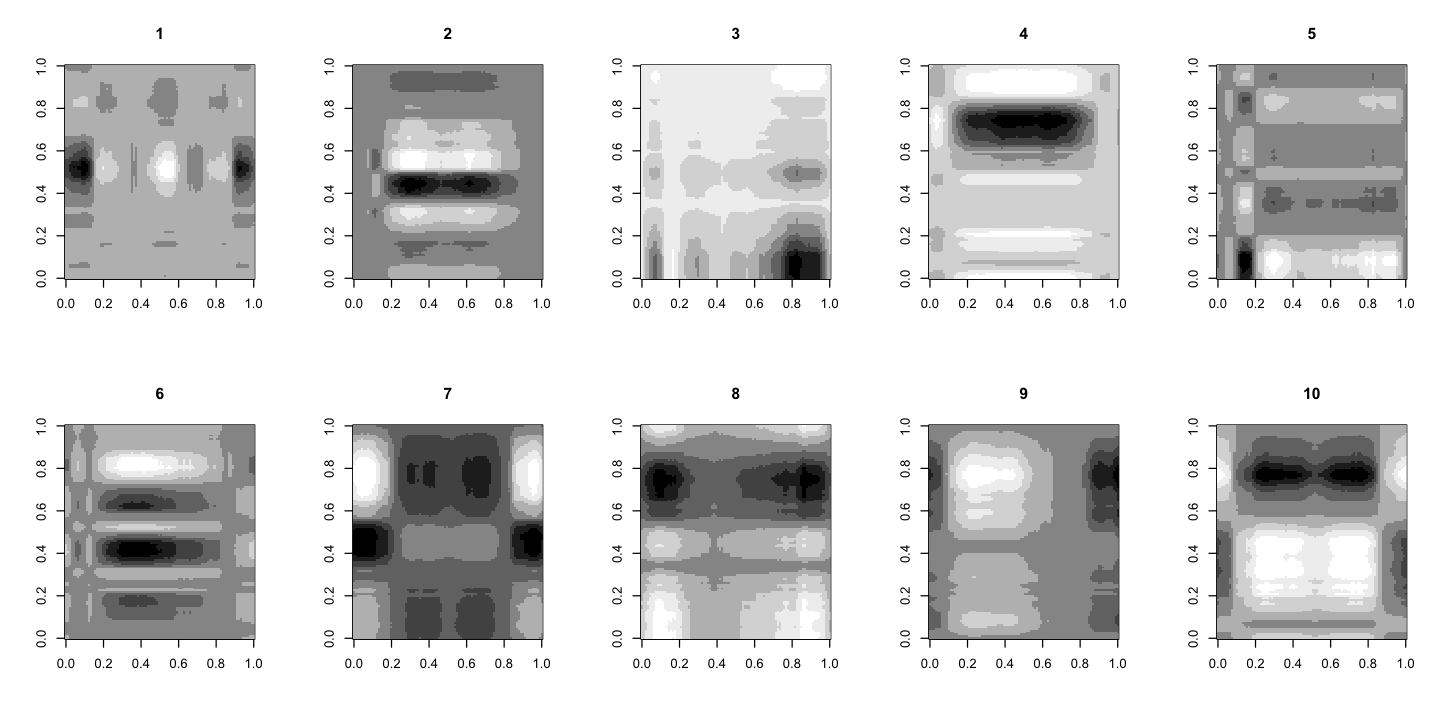

In [23]:
options(repr.plot.width=12, repr.plot.height=6)
layout(rbind(1:5, 6:10))
for(i in seq(10)){
    coef_cp <- outer(res_cp$U[[1]][, i], res_cp$U[[2]][, i])
    image(coef_cp, col=colvec, main=i)
}

## Plot CP Score

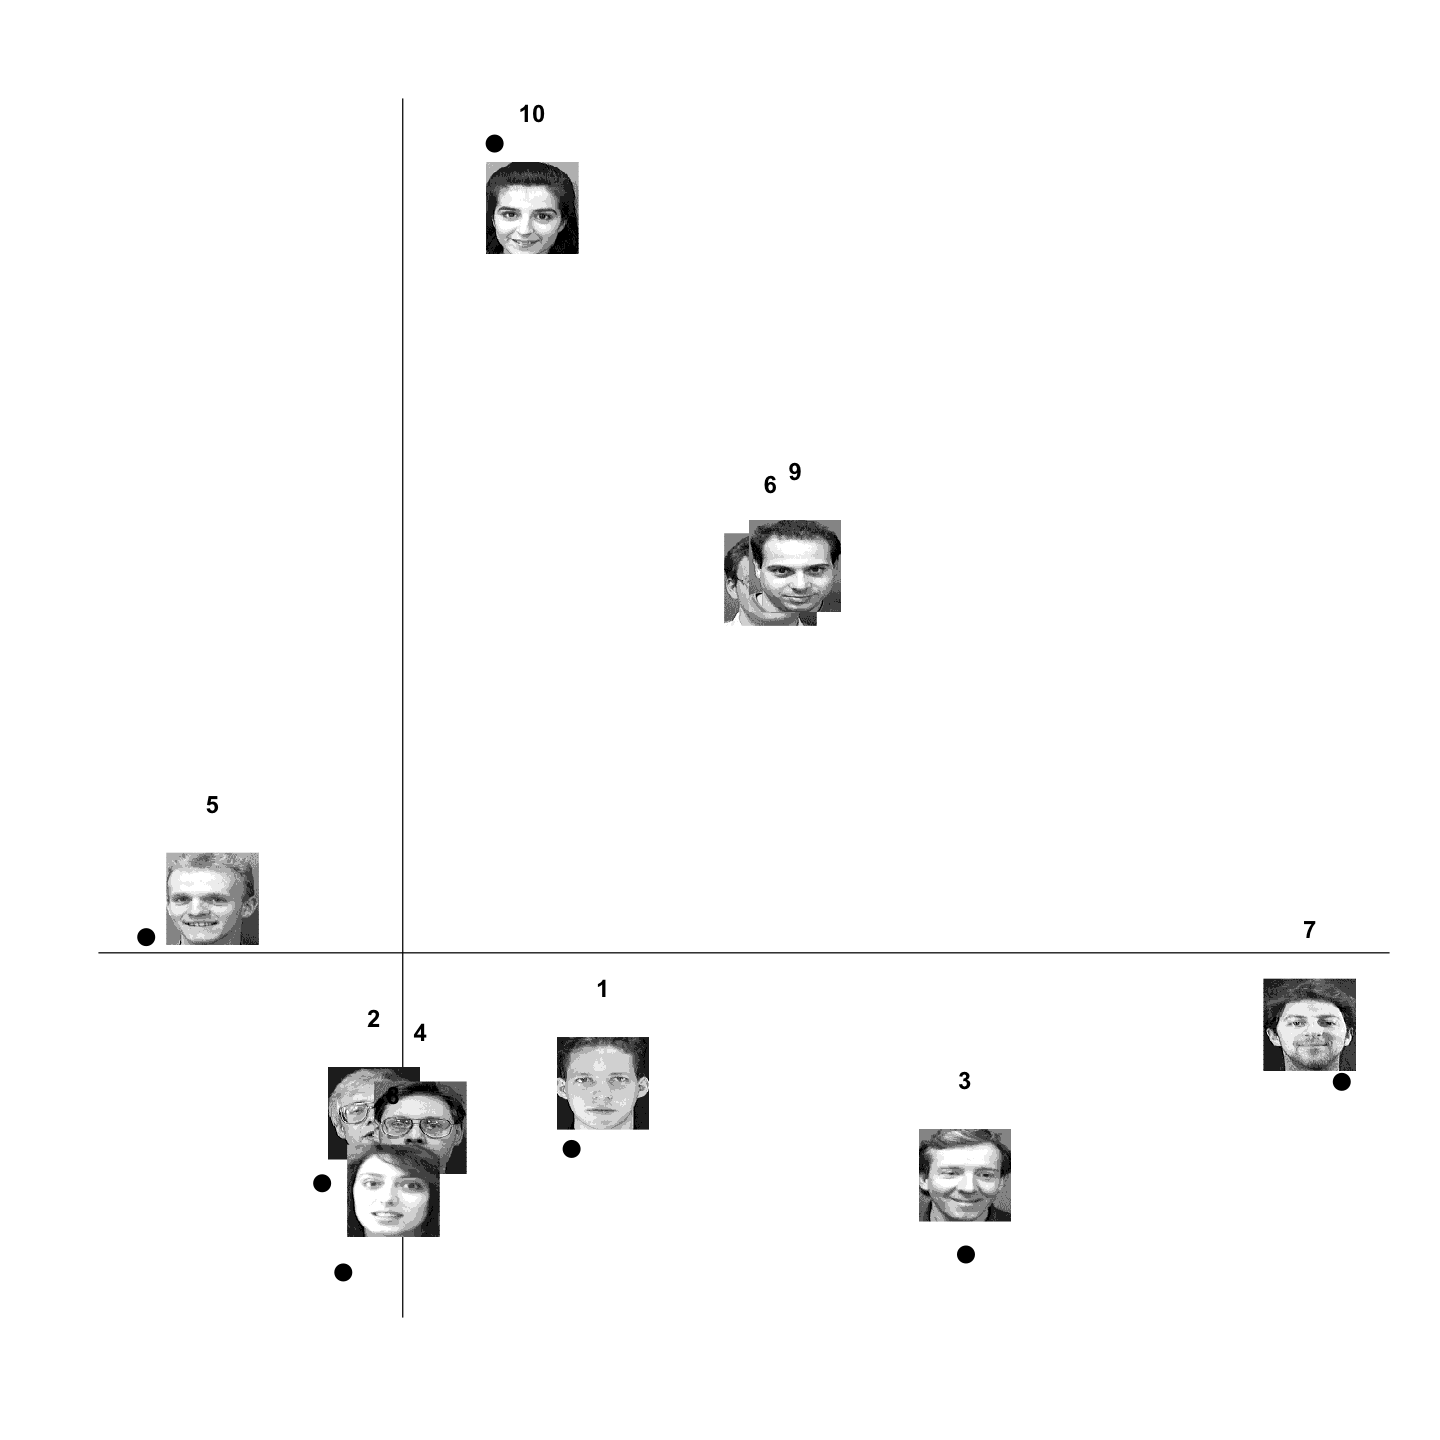

In [24]:
plot_score(res_cp$U[[3]], facedata, colvec)

## Plot Reconstructed Tensor (CP)

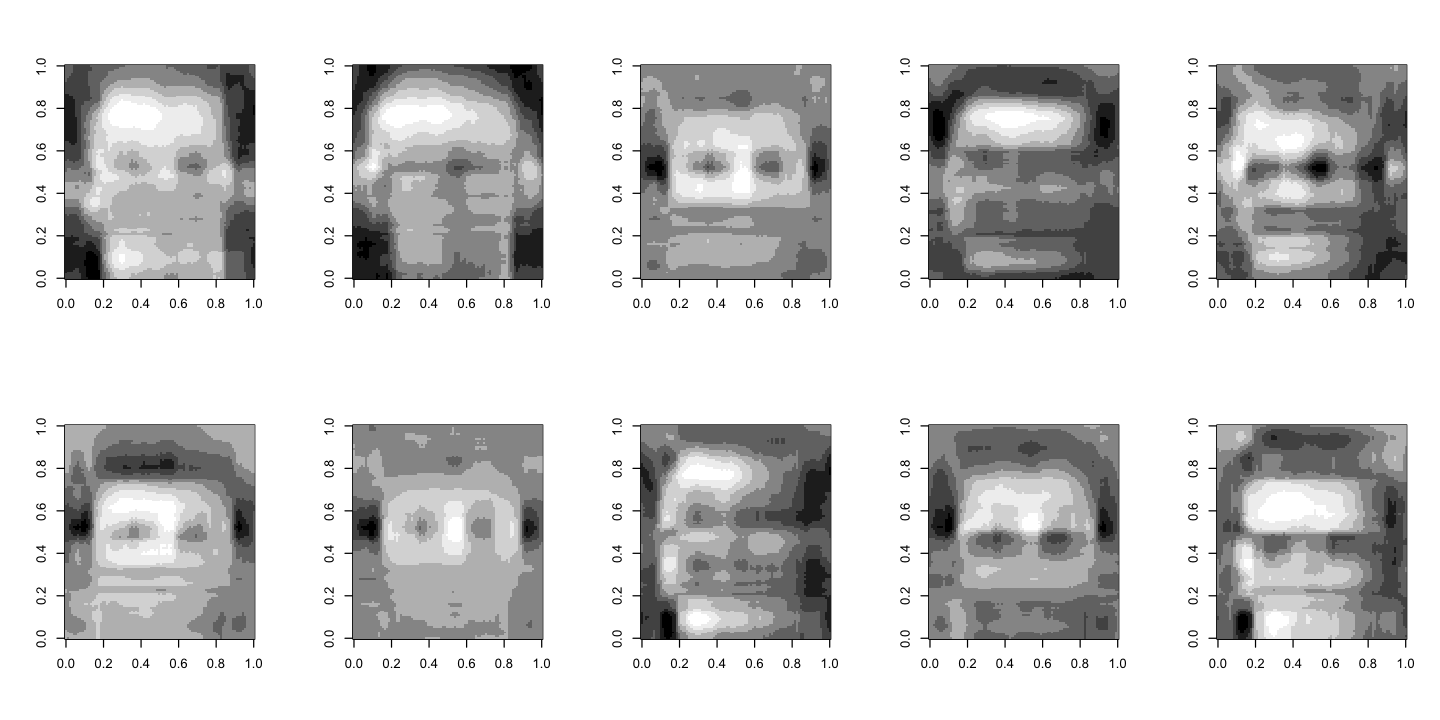

In [25]:
rec_cp <- einsum('il,jl,kl->ijk',
    res_cp$U[[1]], res_cp$U[[2]], res_cp$U[[3]])
options(repr.plot.width=12, repr.plot.height=6)
layout(rbind(1:5, 6:10))
for(i in seq(10)){
    image(rec_cp[,,i], col=colvec)
}

# Tucker/HOOI (Tensor Decomposition)

In [26]:
res_tucker <- tucker(norm_facetensor, c(10,10,10))

  |======================================================================| 100%


## Plot Tucker/HOOI Coefficient

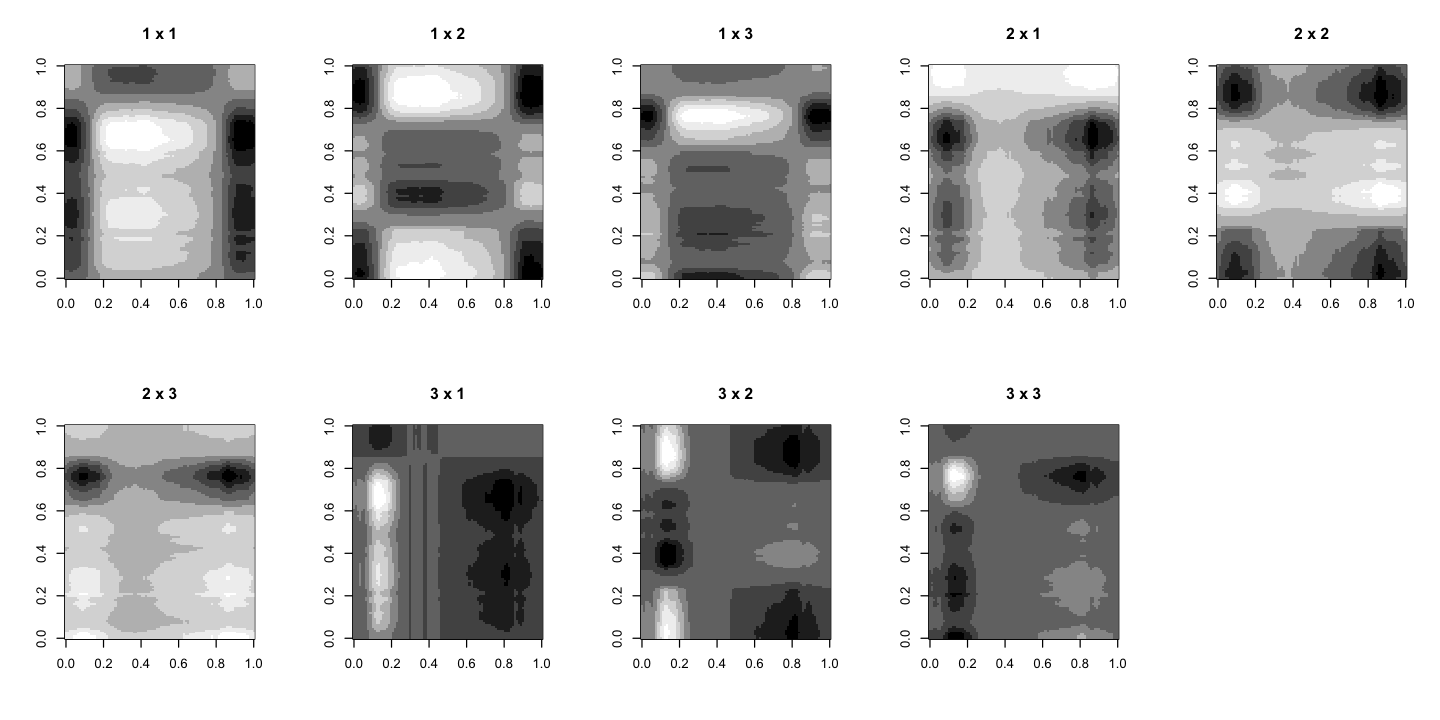

In [27]:
layout(rbind(1:5, 6:10))
for(i in seq(3)){
    for(j in seq(3)){
        coef_tucker <- outer(res_tucker$U[[1]][, i], res_tucker$U[[2]][, j])
        image(coef_tucker, col=colvec, main=paste0(i, " x ", j))
    }
}

## Plot Tucker/HOOI Score

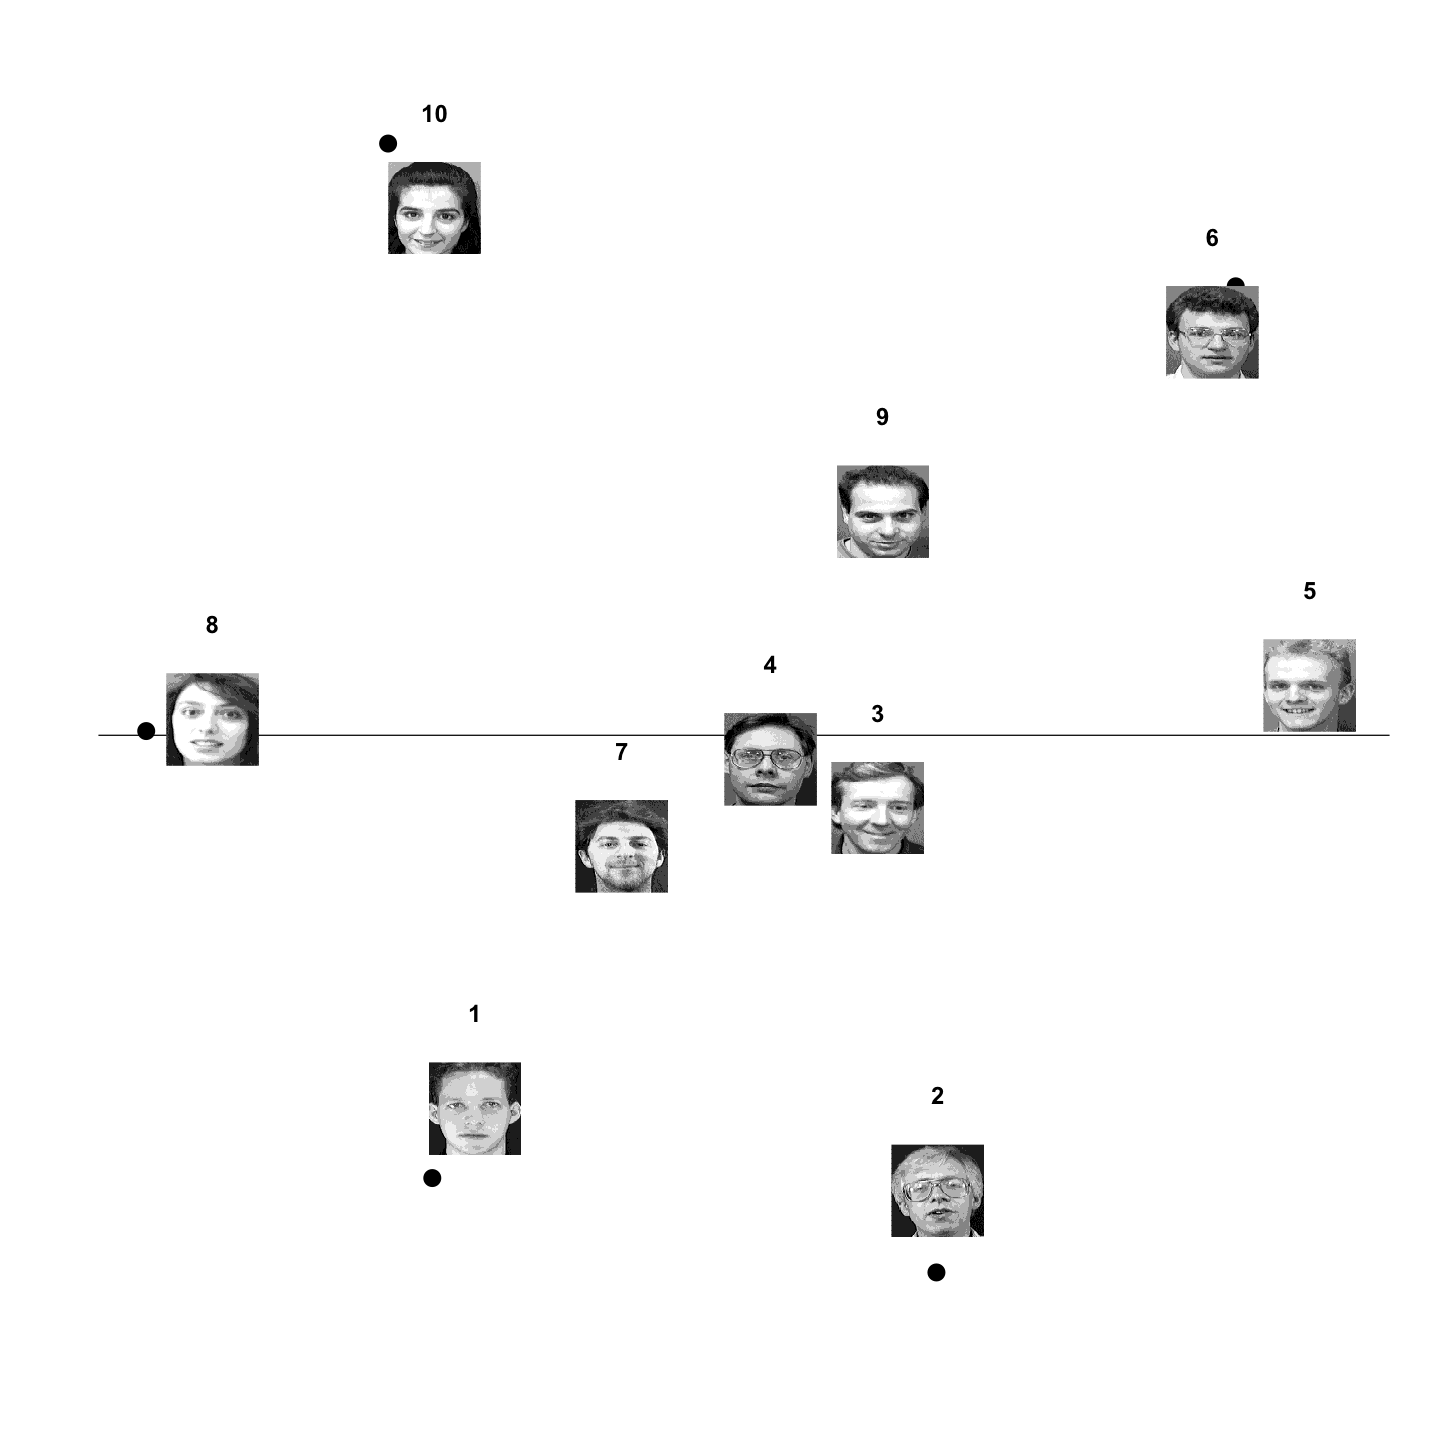

In [28]:
plot_score(res_tucker$U[[3]], facedata, colvec)

## Plot Reconstructed Tensor (Tucker)

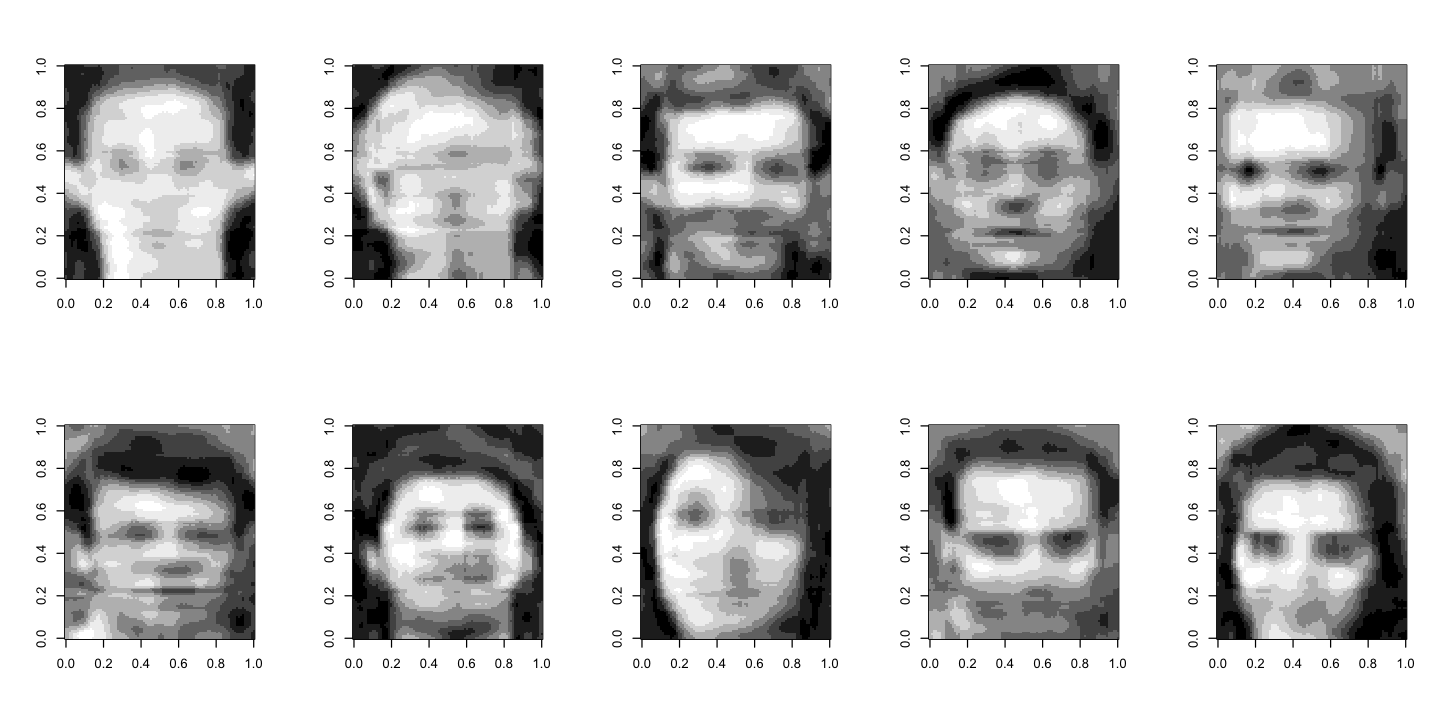

In [29]:
rec_tucker <- recTensor(res_tucker$Z, res_tucker$U, reverse=TRUE)@data
options(repr.plot.width=12, repr.plot.height=6)
layout(rbind(1:5, 6:10))
for(i in seq(10)){
    image(rec_tucker[,,i], col=colvec)
}

# Session Information

In [30]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS/LAPACK: /Users/tsuyusakikouki/opt/anaconda3/envs/r-4.1/lib/libopenblasp-r0.3.15.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] TeachingDemos_2.12 RColorBrewer_1.1-3 einsum_0.1.0       iTensor_0.99.0    
[5] nnTensor_1.1.8     rTensor_1.4.8     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8.3      pillar_1.7.0      compiler_4.1.0    viridis_0.6.2    
 [5] base64enc_0.1-3   tools_4.1.0       dotCall64_1.0-1   digest_0.6.29    
 [9] uuid_1.0-4        viridisLite_0.4.0 jsonlite_1.8.0    evaluate_0.15    
[13] lifecycle_1.0.1   tibble_3.1.6      gtable_0.3.0      pkgconfig_2.0.3  
[17] rlang_1.0.2       DBI_1.1.3         IRdisplay_1.1     cli_3.3.0        
[21] IRkernel_1.3      spam_2.8-0        fastmap_1.1.0     gridExt